# Project Title: Customer Churn Analysis for "Metanprom" Bank

# Project Objective:
Identify churn segments and provide recommendations to reduce customer churn for the bank.

# Data Description:
The dataset contains information about customers of the "Metanprom" bank. The bank is located in Yaroslavl and surrounding cities: Rostov Veliky and Rybinsk.

Columns:

- USERID — User identifier
- score — Credit score
- city — City
- gender — Gender
- age — Age
- equity — Amount of equity points
- balance — Account balance
- products — Number of products the customer uses
- credit_card — Whether the customer has a credit card
- last_activity — Active customer
- EST_SALARY — Estimated customer income
- churn — Churn indicator.

# Decomposition (Research Plan):

1. **Data Loading and Description**
  
2. **Data Preparation:**
   - Analyze the nature of missing values and handle them.
   - Encoding (for use in correlation analysis).

3. **EDA (Exploratory Data Analysis):**
   - Analyze the distribution of features, including in the context of churn. For continuous variables, identify churn intervals; for categorical variables, find values with a churn rate higher than the bank's average.
   - Correlation analysis and interpretation.

4. **Testing Two Statistical Hypotheses:**
   - One hypothesis involves testing the difference in income between customers who churned and those who stayed.

5. **Intermediate Conclusions:**
   - Summarize the results of the EDA, correlation analysis, and hypothesis testing. Identify features that influence customer churn.

6. **Segmentation:**
   - Identify three segments (each including at least 500 customers) where the churn rate is higher than the bank's average churn rate.


7. **Formulation of Targeted Recommendations:**
   - Develop targeted recommendations for working with the identified segments.






## Data Loading and Description

In [1]:
pip install phik

     |████████████████████████████████| 686 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import math
import itertools
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
from scipy.stats import mannwhitneyu

In [3]:
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Data Loading and Description:

The dataset consists of 10,000 rows.
Missing values are present in the columns age and balance.
Data types for all columns are correct.

Convert column names to snake_case.

In [6]:
df.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace = True)

In [7]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

## Data Preparation

Check for Complete Duplicates in the Data

In [8]:
df.duplicated().sum()

0

No complete duplicates were found. Next, we will check for implicit duplicates by user_id.

In [9]:
duplicated_rows = df[df.duplicated(subset=['user_id'], keep=False)]
sorted_duplicated_rows = duplicated_rows.sort_values(by='user_id')
print("Отсортированные дублированные строки по user_id:")
print(sorted_duplicated_rows)

Отсортированные дублированные строки по user_id:
      user_id  score       city gender   age  equity      balance  products  \
1893   116540  883.0    Рыбинск      Ж  55.0       1    362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0          NaN         1   
7542   117943  880.0  Ярославль      Ж  40.0       0          NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6   1036832.93         4   
5896   120258  905.0  Ярославль      М  30.0       0          NaN         1   
...       ...    ...        ...    ...   ...     ...          ...       ...   
2597   226719  990.0  Ярославль      М  37.0       4  14648692.14         2   
8205   227795  840.0    Рыбинск      М  34.0       2    350768.03         1   
8497   227795  839.0  Ярославль      М  34.0       2    326593.14         2   
6457   228075  839.0    Рыбинск      М  39.0       5    507199.85         3   
1247   228075  932.0  Ярославль      М   NaN       5   7601719.20         2   

  

146 duplicates were identified by user_id. We will examine these duplicates.

In [10]:
sorted_duplicated_rows['city'].unique()

array(['Рыбинск', 'Ярославль'], dtype=object)

The same user_id is assigned to different bank customers in the cities of Rybinsk and Yaroslavl. Therefore, these records are not actual duplicates. 

Examine Missing Values in the age and balance Columns:

Analyze the relationship between missing values and other features by creating a new indicator variable.
First, use pd.get_dummies() to encode unordered categorical variables such as age and gender. This will preserve the original columns and add new binary columns for each category value.

In [11]:
df_encoded = pd.get_dummies(df, columns=['gender', 'city'], drop_first=True)

In [12]:
df_encoded.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,city_Рыбинск,city_Ярославль
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,0,1,0
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,1,0,1


Now we can use these features to assess if there is any dependency between missing values and other features, such as average salary, average age, median number of products, and average credit score.

Create a new indicator variable for each column with missing values (age and balance). This indicator will take the value 1 if the value is missing and 0 if the value is present.

In [13]:
df_encoded['age_missing'] = df_encoded['age'].isna().astype(int)
df_encoded['balance_missing'] = df_encoded['balance'].isna().astype(int)

Create a Pivot Table to Show How Average Values of Other Variables Change Depending on the Presence or Absence of Missing Values in age and balance:

In [14]:
pivot_table = df_encoded.pivot_table(
    values=['score', 'age', 'products', 'est_salary'], 
    index=['age_missing', 'balance_missing'], 
    aggfunc={'score': 'mean', 'age': 'mean', 'products': 'median', 'est_salary': 'mean'}
)

print(pivot_table)


                                   age     est_salary  products       score
age_missing balance_missing                                                
0           0                42.924366  124520.394264         2  843.744120
            1                42.093023  226345.417464         1  865.357174
1           0                      NaN  110249.272000         2  840.000000
            1                      NaN  221295.153750         1  864.625000


Missing values in age occur together with missing values in balance, as indicated by the matching NaNs in rows where age_missing=1. This suggests a potential joint occurrence of missing values in these two features, but missing values in age do not significantly depend on other features by themselves. The average salary is significantly higher for records with missing values in balance. Customers with missing values in balance tend to have higher average credit scores (score), which is also reflected in the data. The number of products (products) is lower for records with missing balance.


The correlation matrix will allow us to see how strongly missing values in age and balance correlate with other variables.

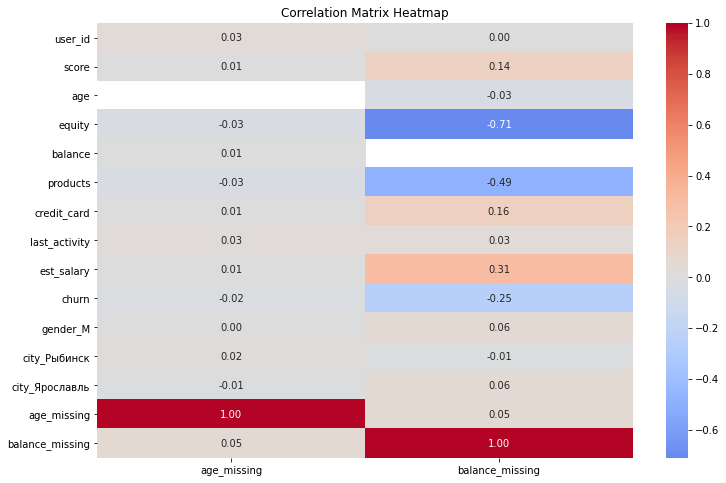

In [15]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix[['age_missing', 'balance_missing']], annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

Missing values in `age` do not show significant correlation with other features, as all correlation values are close to zero. This may suggest that missing values in `age` are random (MCAR) and do not depend on other features. Missing values in `balance` have a significant negative correlation with `equity` (-0.71) and `products` (-0.49), indicating a strong dependency. This may imply that customers with high levels of equity and a large number of products are less likely to have missing values in `balance`. Missing values in `balance` also have a positive correlation with `EST_SALARY` (0.31) and `credit_card` (0.16), suggesting that customers with higher salaries and those who have a credit card are more likely to have missing values in `balance`.

Missing Data Analysis: Missing values in age are likely random (MCAR) as they do not depend on other variables. Missing values in balance are likely not random (MNAR or MAR) as they show significant correlations with equity, products, and positively correlate with EST_SALARY and credit_card. This suggests a potential relationship between these features and the presence of missing values. We will retain the missing values in balance as they are.

Duplicate Analysis: There are no complete duplicates in the data. There are 146 duplicates based on user_id, but they belong to different customers in the cities of Rybinsk and Yaroslavl, meaning these records are not actual duplicates.

## Exploratory Data Analysis

Let's examine the average bank customer.

In [16]:
df_encoded.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_М,city_Рыбинск,city_Ярославль,age_missing,balance_missing
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000,0.500500,0.269500,0.588800,0.002600,0.229500
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864,0.500025,0.443722,0.492076,0.050926,0.420532
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The average bank customer has the following characteristics:

- Age is approximately 43 years.
- Has a good credit score (848.70).
- Maintains a significant account balance (average balance of 827,794.30).
- Uses an average of two bank products (average number of products is 1.87).
- Frequently has a credit card (68% of bank customers have a credit card).
- Has a high estimated salary (147,866.90).
- Has an 18% probability of churn.
- Gender distribution is roughly equal between men and women.
- Resides in Yaroslavl with a probability of 59%.

Let's examine the categorical features (city, gender, products, credit_card, equity, last_activity): We analyze these to understand which values of the categorical features are more or less prone to churn.

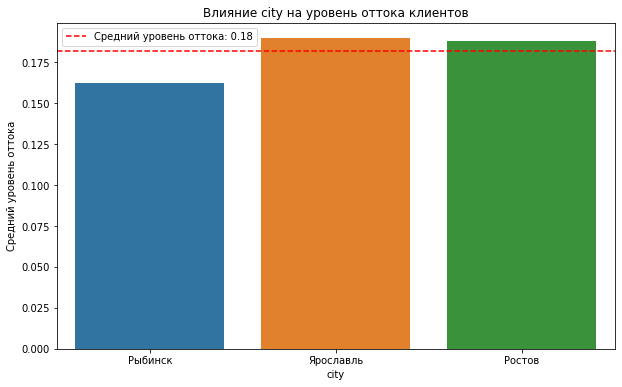

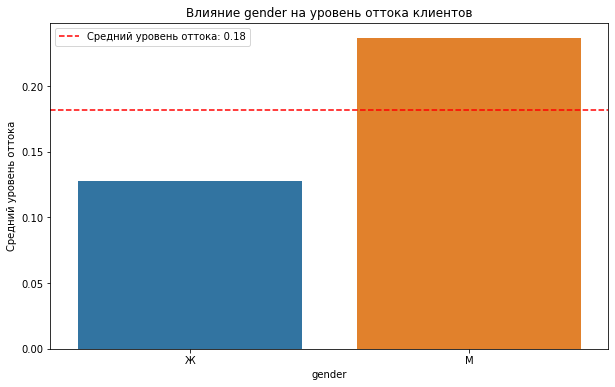

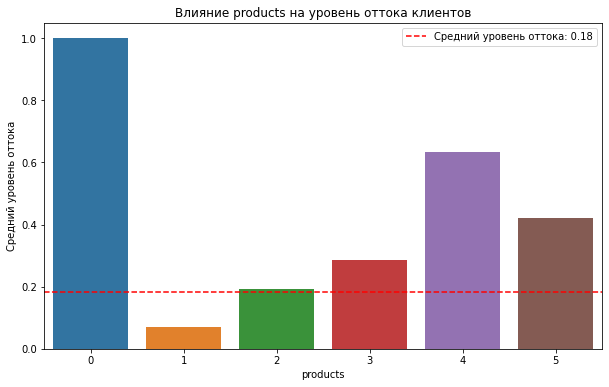

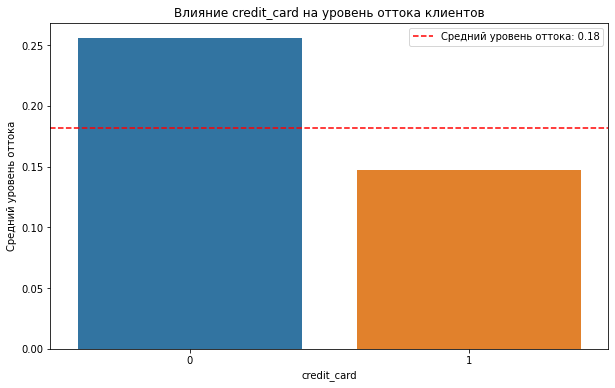

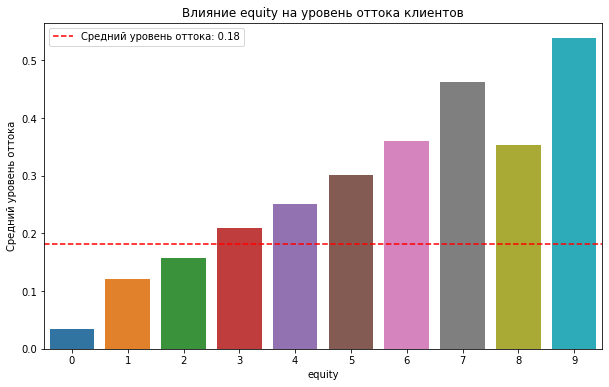

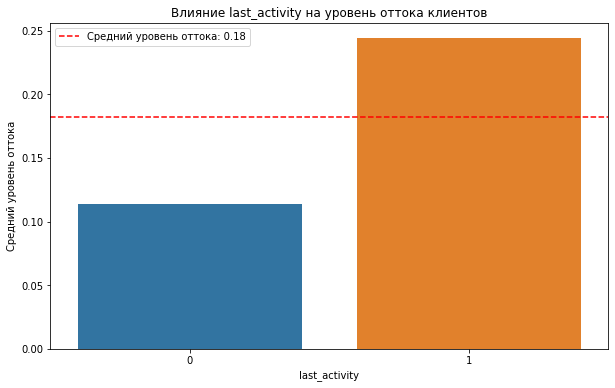

In [17]:

average_churn = df['churn'].mean()

categorical_features = ['city', 'gender','products', 'credit_card', 'equity','last_activity']


for column in categorical_features:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=column, y='churn', data=df, ci=None)
    plt.axhline(y=average_churn, color='r', linestyle='--', label=f'Средний уровень оттока: {average_churn:.2f}')
    plt.title(f'Влияние {column} на уровень оттока клиентов')
    plt.xlabel(column)
    plt.ylabel('Средний уровень оттока')
    plt.legend()
    plt.show()

In [18]:
counts = df['products'].value_counts()
print(counts)

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64


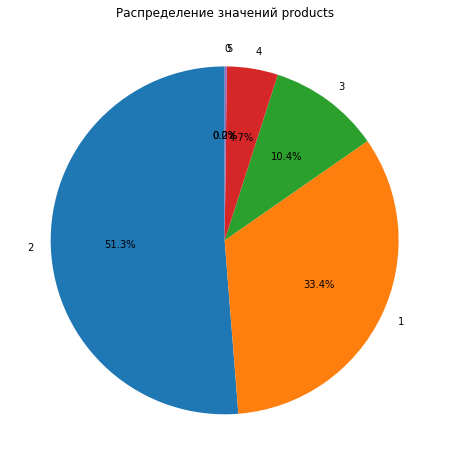

In [19]:

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение значений products')
plt.show()

The number of products is 0 for only one customer. This is an anomaly and may indicate a data entry error. The remaining values are distributed correctly: 33.4% of customers have one product, 51.3% have two products, 10.4% have three products, 4.7% have four products, and 0.19% have five products.

In [20]:
df = df[df['products'] != 0]

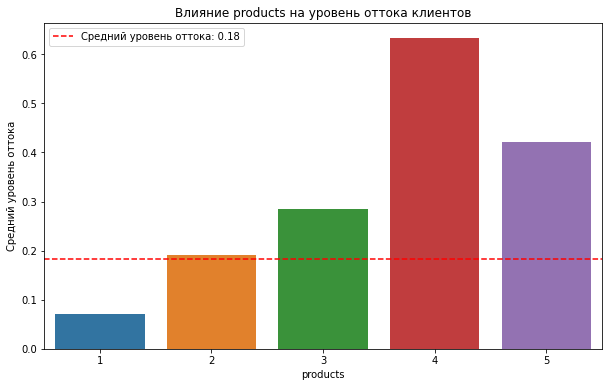

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='products', y='churn', data=df, ci=None)
plt.axhline(y=average_churn, color='r', linestyle='--', label=f'Средний уровень оттока: {average_churn:.2f}')
plt.title(f'Влияние products на уровень оттока клиентов')
plt.xlabel('products')
plt.ylabel('Средний уровень оттока')
plt.legend()
plt.show()

**According to the criteria:**

- **City:** The churn rate is lower in Rybinsk compared to the average churn rate, while in Yaroslavl and Rostov, it is slightly higher, around 19%.
- **Gender:** Men have a higher churn rate compared to the average.
- **Number of Products:** Customers with more than two products have a higher churn rate.
- **Credit Card:** The churn rate is higher for customers without a credit card.
- **Equity:** The churn rate is higher for customers with three or more properties.
- **Last Activity:** Active customers have a higher churn rate.

Analyze the distribution of continuous features (score, age, balance, est_salary): We analyze these features to find intervals where churn is higher compared to loyalty.

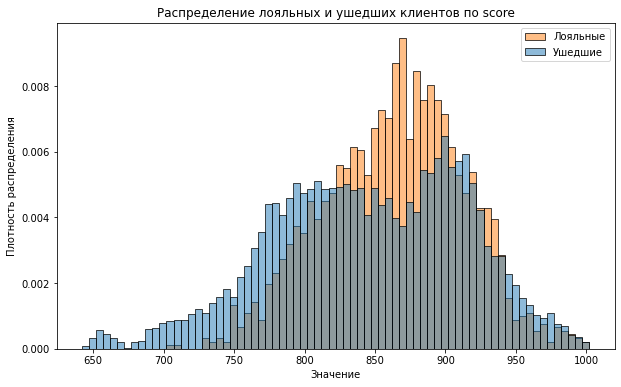

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='score', hue='churn', stat="density", common_norm=False, bins=50, binwidth=5, kde=False)
plt.title('Распределение лояльных и ушедших клиентов по score')
plt.ylabel('Плотность распределения')
plt.xlabel('Значение')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show()

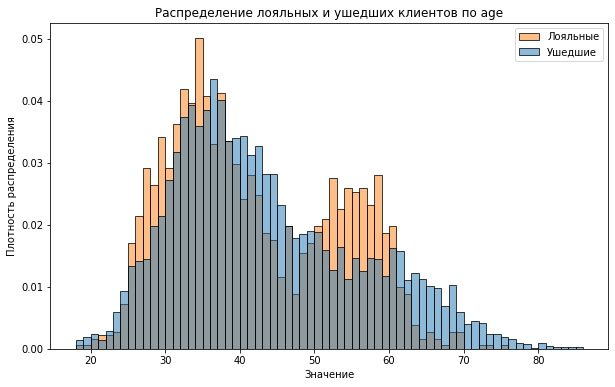

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='churn', stat="density", common_norm=False, bins=50, binwidth=1, kde=False)
plt.title('Распределение лояльных и ушедших клиентов по age')
plt.ylabel('Плотность распределения')
plt.xlabel('Значение')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show()

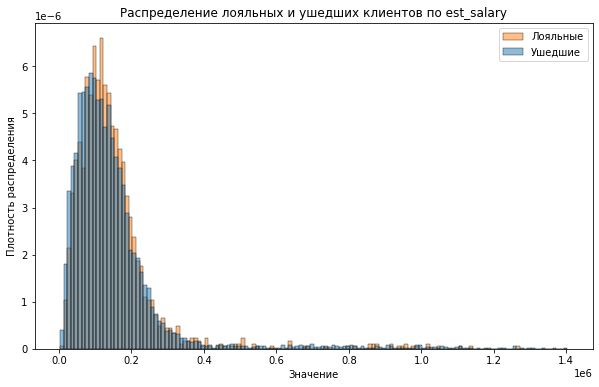

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='est_salary', hue='churn', stat="density", common_norm=False, bins=50, binwidth=10000, kde=False)
plt.title('Распределение лояльных и ушедших клиентов по est_salary')
plt.ylabel('Плотность распределения')
plt.xlabel('Значение')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show()

In [25]:
df['est_salary'].describe()

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

Upper Bound = Q3 + 1.5 × (Q3 - Q1) = 174,500.5 + 1.5 × 99,248.6 = 323,373.4. Therefore, values of est_salary above approximately 323,373.40 can be considered outliers.

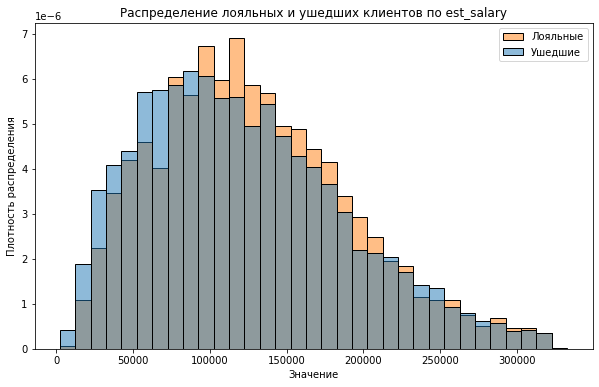

In [26]:
filtered_df_salary = df[df['est_salary'] <= 323373.40]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df_salary, x='est_salary', hue='churn', stat="density", common_norm=False, bins=50, binwidth=10000, kde=False)
plt.title('Распределение лояльных и ушедших клиентов по est_salary')
plt.ylabel('Плотность распределения')
plt.xlabel('Значение')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show()

In [27]:
df['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

We will trim the outlier values for balance. 
Upper Bound = 980,705.80 + 1.5 × (980,705.80 − 295,554.20) = 980,705.80 + 1,027,727.40 = 2,008,433.20

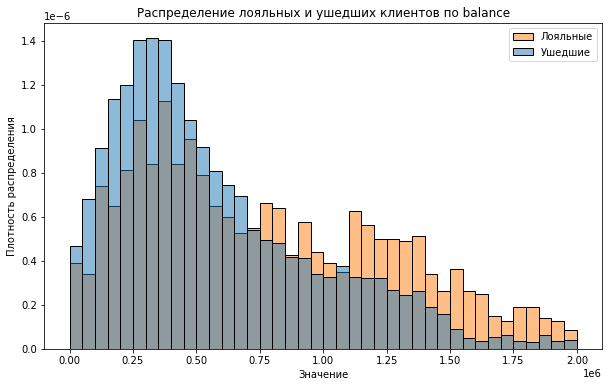

In [28]:
filtered_df_balance = df[df['balance'] <= 2008433.20]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_df_balance, x='balance', hue='churn', stat="density", common_norm=False, bins=25, binwidth=50000, kde=False)
plt.title('Распределение лояльных и ушедших клиентов по balance')
plt.ylabel('Плотность распределения')
plt.xlabel('Значение')
plt.legend(['Лояльные', 'Ушедшие'])
plt.show()

According to the criteria:

Score: The churn rate is higher for customers with a score below 850.
Age: The churn rate is higher for customers aged between 40 and 50 years and those older than 62 years.
Salary: The churn rate is higher for customers with a salary up to 100,000.
Balance: The churn rate is higher for customers with a balance up to 750,000.

Remove the columns age_missing, balance_missing, and user_id as they are not involved in the correlation analysis.

In [29]:
df_encoded_2 = df_encoded.drop(columns=['age_missing', 'balance_missing','user_id'])


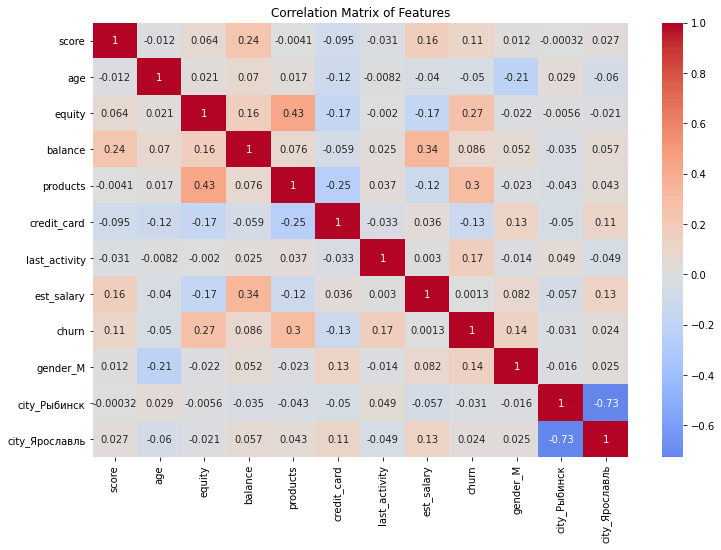

In [30]:
corr_matrix = df_encoded_2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

Use the Chedoke scale for interpreting the strength of correlation: 0 - 0.3: weak correlation, 0.3 - 0.5: moderate correlation, 0.5 - 0.7: noticeable correlation, 0.7 - 0.9: strong correlation, 0.9 - 1: very strong correlation. According to the correlation matrix results, we observe a correlation between churn and both equity and products.

We use the phik library—this library works with all features at once, determining the appropriate type of correlation based on the category of each feature. The advantage of this library is that it also captures nonlinear dependencies.

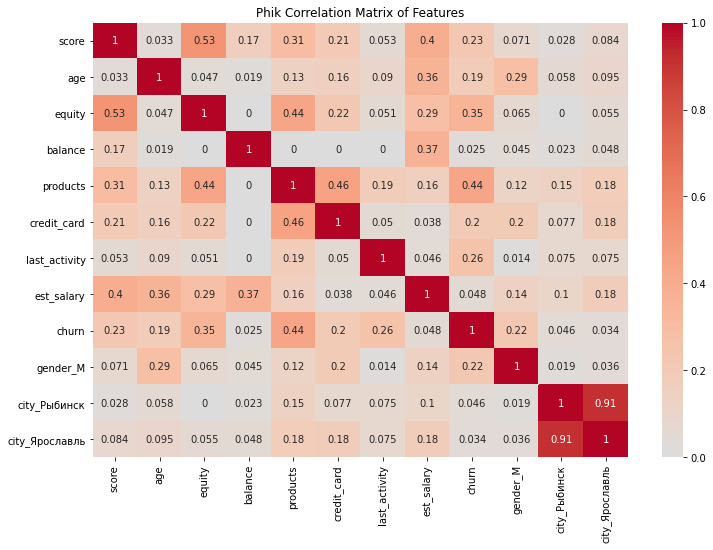

In [31]:

interval_cols = ['score', 'age', 'balance', 'est_salary']


phik_matrix = df_encoded_2.phik_matrix(interval_cols=interval_cols)


plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Phik Correlation Matrix of Features')
plt.show()

According to the analysis using the phik library, churn is correlated with products and equity, as well as with score, age, credit_card, and gender_M. These findings confirm the results observed from the distribution of variables between churned and non-churned customers. We can now proceed to identify churn segments.

## Statistical Hypothesis Testing

### Testing the Hypothesis of Income Differences Between Churned and Retained Bank Customers

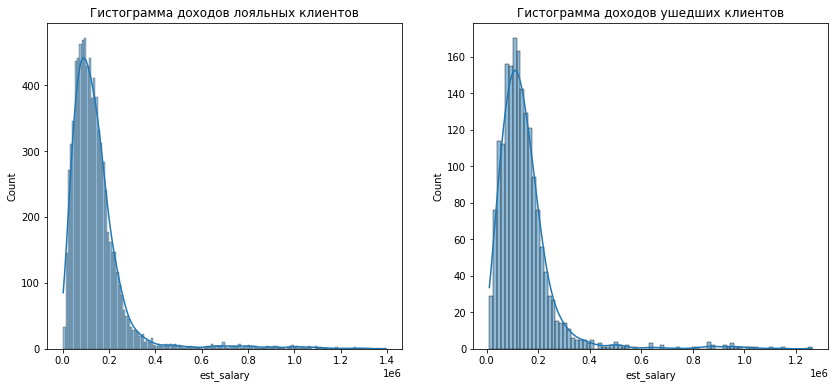

In [32]:
loyal_customers_salary = df[df['churn'] == 0]['est_salary']
churned_customers_salary = df[df['churn'] == 1]['est_salary']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(loyal_customers_salary, kde=True)
plt.title('Гистограмма доходов лояльных клиентов')

plt.subplot(1, 2, 2)
sns.histplot(churned_customers_salary, kde=True)
plt.title('Гистограмма доходов ушедших клиентов')

plt.show()


The presence of a significant right tail indicates a deviation from a normal distribution, so we cannot use the standard Student's t-test. We will use the non-parametric Mann-Whitney test to test the hypothesis.

H0: The distribution of income (est_salary) is the same for churned and retained customers.
H1: The distributions of income in these two groups are different.

In [33]:

stat, p_value = mannwhitneyu(loyal_customers_salary, churned_customers_salary, alternative='two-sided')

alpha = 0.05

print(f"Статистика: {stat}")
print(f"p-значение: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: доходы различаются между ушедшими и лояльными клиентами.")
else:
    print("Не можем отвергнуть нулевую гипотезу: нет значительных различий в доходах между ушедшими и лояльными клиентами.")

Статистика: 7027175.0
p-значение: 0.00021160652203623057
Отвергаем нулевую гипотезу: доходы различаются между ушедшими и лояльными клиентами.


Statistic: 7,027,175.0
p-value: 0.00021160652203623057
Reject the null hypothesis: Incomes differ between churned and loyal customers.

### Testing the Hypothesis of Differences in Credit Scores Between Churned and Retained Bank Customers

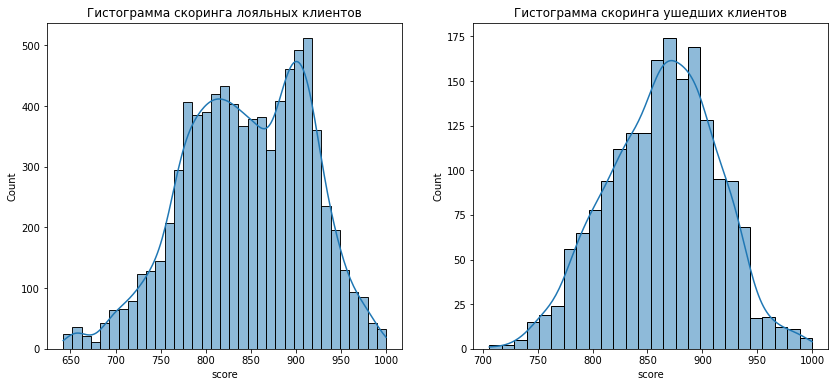

In [34]:
loyal_customers_score= df[df['churn'] == 0]['score']
churned_customers_score = df[df['churn'] == 1]['score']


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(loyal_customers_score, kde=True)
plt.title('Гистограмма скоринга лояльных клиентов')

plt.subplot(1, 2, 2)
sns.histplot(churned_customers_score, kde=True)
plt.title('Гистограмма скоринга ушедших клиентов')

plt.show()

The distribution is again not normal. Therefore, we will apply the Mann-Whitney U test to test the hypothesis. The significance level is 5%.

H0: The distribution of credit scores (score) is the same for churned and retained customers.
H1: The distributions of credit scores in these two groups are different.

In [35]:

stat, p_value = mannwhitneyu(loyal_customers_score, churned_customers_score, alternative='two-sided')

alpha = 0.05


print(f"Статистика: {stat}")
print(f"p-значение: {p_value}")


if p_value < alpha:
    print("Отвергаем нулевую гипотезу: скоринг различается между ушедшими и лояльными клиентами.")
else:
    print("Не можем отвергнуть нулевую гипотезу: нет значительных различий в скоринге между ушедшими и лояльными клиентами.")

Статистика: 6369790.0
p-значение: 7.364570509844462e-22
Отвергаем нулевую гипотезу: скоринг различается между ушедшими и лояльными клиентами.


Statistic: 6,369,790.0
p-value: 7.364570509844462e-22
Reject the null hypothesis: Credit scores differ between churned and loyal customers.
Conclusion: The hypothesis testing results indicate that the distributions of income and credit scores differ between churned and retained customers.

## Summary of Findings: Conclusions from EDA, Correlation Analysis, and Hypothesis Testing, and Identification of Features Affecting Customer Churn

**Based on the results of EDA, correlation analysis, and hypothesis testing, we identified the features affecting customer churn:**

- Male gender
- Age between 40 and 50 years and above 62 years
- Ownership of 3 or more properties
- Credit score below 850
- Salary up to 100,000
- More than 2 bank products
- Balance up to 750,000

The city variable has a minor impact on churn rates. The `credit_card` feature is related to the number of bank products and will not be considered separately. We can categorize the features affecting churn into three groups: demographic (gender, age), financial (salary, account balance, number of properties, credit score), and interaction with the bank (number of bank products, `last_activity`). 

We need to identify 3 churn segments that are manageable for the marketing department. These segments should be reasonably sized (at least 500 people). The most influential features for churn are the number of bank products and the amount of equity.

## Identify three segments (each including at least 500 customers) where the churn rate is higher than the average churn rate for the bank.

Create a table showing the churn rate for individual features and combinations of two features, as well as the number of customers in each segment. Filter by a minimum segment size of 500 and an average churn rate of 18%.

In [36]:

results = pd.DataFrame(columns=['Признак', 'Количество клиентов', 'Уровень оттока'])


filters = {
    'Зарплата <= 100000': df_encoded['est_salary'] <= 100000,
    'Баланс <= 750000': df_encoded['balance'] <= 750000,
    'Мужской пол': df_encoded['gender_М'] == 1,
    'Возраст 40-50 лет': (df_encoded['age'] >= 40) & (df_encoded['age'] <= 50),
    'Возраст >= 62 лет': df_encoded['age'] >= 62,
    'Количество продуктов >= 2': df_encoded['products'] >= 2,
    'Количество продуктов >= 3': df_encoded['products'] >= 3,
    'Количество собственности >= 3': df_encoded['equity'] >= 3,
    'Cкоринг < 850' :df_encoded['score'] <850,
    'Активность':df_encoded['last_activity'] == 1
}


for label, filter_condition in filters.items():
    segment_df = df_encoded[filter_condition]
    churn_rate = segment_df['churn'].mean()
    segment_size = segment_df.shape[0]
    
    
    if segment_size > 500 and churn_rate > 0.18:
        results = results.append({
            'Признак': label,
            'Количество клиентов': segment_size,
            'Уровень оттока': f'{churn_rate:.2%}'
        }, ignore_index=True)


for combo in itertools.combinations(filters.items(), 2):
    label1, filter1 = combo[0]
    label2, filter2 = combo[1]
    
    
    combined_filter = filter1 & filter2
    segment_df = df_encoded[combined_filter]
    churn_rate = segment_df['churn'].mean()
    segment_size = segment_df.shape[0]
    
    
    if segment_size > 500 and churn_rate > 0.18:
        results = results.append({
            'Признак': f'{label1} и {label2}',
            'Количество клиентов': segment_size,
            'Уровень оттока': f'{churn_rate:.2%}'
        }, ignore_index=True)


results = results.sort_values(by='Уровень оттока', ascending=False)
pd.set_option('display.max_colwidth', None)

display(results)

,Признак,Количество клиентов,Уровень оттока
15,Мужской пол и Количество продуктов >= 3,752,50.00%
27,Количество продуктов >= 3 и Активность,824,47.45%
25,Количество продуктов >= 3 и Количество собственности >= 3,1225,42.61%
2,Количество продуктов >= 3,1532,39.49%
22,Количество продуктов >= 2 и Количество продуктов >= 3,1532,39.49%
28,Количество собственности >= 3 и Активность,2928,36.51%
16,Мужской пол и Количество собственности >= 3,2728,35.45%
24,Количество продуктов >= 2 и Активность,3470,32.36%
14,Мужской пол и Количество продуктов >= 2,3198,31.64%
18,Мужской пол и Активность,2586,29.81%


Based on this data, we can identify three distinct segments that are sufficiently large and have a high churn rate, which the marketing department can target:

- Male gender and Number of products ≥ 3: Segment size 752, churn rate 50.00%
- Number of properties ≥ 3 and Activity: Segment size 2,928, churn rate 36.51%
- Salary ≤ 100,000 and Number of products ≥ 3: Segment size 673, churn rate 28.83%

## Formulating targeted recommendations for working with the identified segments.

**1. Segment: Men with Number of Products ≥ 3**  
**Churn Rate: 50.00% (752 customers)**

This segment is characterized by active use of multiple financial products. Recommendations:
- **Increase Loyalty through Personalized Offers:** Develop loyalty programs targeted at customers with multiple products. This could include discounts or bonuses for actively using several products simultaneously.
- **Optimize Product Portfolio:** Conduct surveys or interviews to understand which products or services customers find unnecessary or inconvenient, and offer simplified options.
- **Offer Financial Consultations:** Many customers may not be using the bank’s products effectively. Offer financial management consultations to increase their satisfaction with product usage.
- **Use Male-Oriented Design in Marketing Materials:** Tailor marketing materials to appeal to a male audience.

**2. Segment: Number of Properties ≥ 3 and Active Bank Customers**  
**Churn Rate: 36.51% (2928 customers)**
This segment is characterized by owning multiple properties, indicating strong financial standing and an inclination towards investment. Recommendations:
- **Enhance Property Ownership Benefits:** Create programs offering additional advantages or discounts for customers with significant property holdings. This could include exclusive mortgage offers or improved conditions for home or car insurance.
- **Financial Planning Program:** Customers with substantial property may value assistance with long-term asset planning and risk management. Launch personalized property and capital management consultations.
- **Implement Cross-Selling Programs:** Consider offering additional products that may interest owners of multiple properties, such as premium credit cards or investment products.

**3. Segment: Customers with Salary ≤ 100,000 and Number of Products ≥ 3**  
**Churn Rate: 28.83% (673 customers)**

This segment actively uses the bank's products and has a relatively low income. Recommendations:
- **Develop Financial Literacy:** Customers with a lower income and multiple products might struggle with payments or management. Organize financial literacy and budgeting programs.
- **Review Fees and Conditions:** Analyze the current terms of the products used by customers in this segment and offer more favorable or affordable options, such as reduced fees or offers with lower payments.
- **Personalized Financial Offers:** Develop offers that better fit the financial capabilities of these customers, such as more accessible credit lines, flexible repayment plans, cashback on cards, bonuses for long-term engagement, or referral incentive programs.